
    1. DataSet Analysis
    2. Data Visualization
    3. Data Preparation
    4. Multicollinearity Consideration
    5. Logistic Regression with SciKit Learn
    6. Testing and Training Data Sets
    7. Conclusion and More Resources
    
    
Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

# Data set

http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

In [2]:
import math
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# ML results evaluation
from sklearn import metrics

# Dataset from statsmodel
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [5]:
# classification 'had affair' binary

In [6]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [7]:
# apply to affairs columns
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [9]:
# groupby aggregate

df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


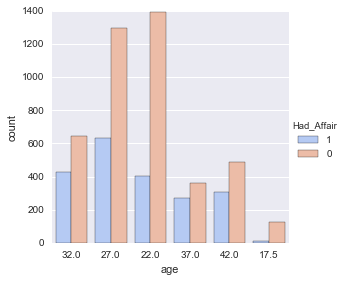

In [11]:
sns.factorplot('age',hue='Had_Affair',palette='coolwarm',data=df,kind='count')

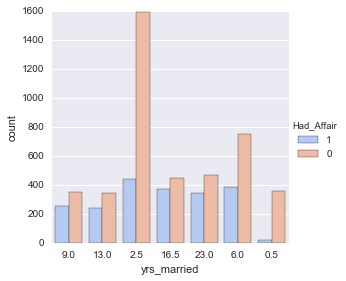

In [12]:
sns.factorplot('yrs_married',data=df, hue='Had_Affair',palette = 'coolwarm',kind='count')

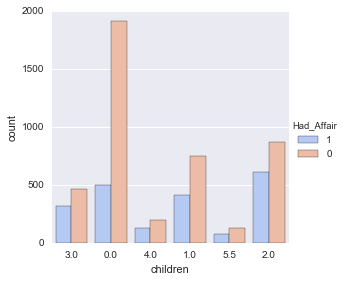

In [13]:
sns.factorplot('children',data=df, hue='Had_Affair',palette = 'coolwarm',kind='count')

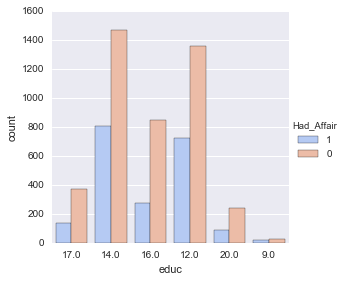

In [14]:
sns.factorplot('educ',data=df, hue='Had_Affair',palette = 'coolwarm',kind='count')

# 3. Data Preparation

In [17]:
# Dummy variable columns, new dataframe for categorical variables
import pandas as pd

# X AND Y for logistic regression
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [18]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [20]:
# columns names for those new dataframes
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

hus_occ_dummies.columns =['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [21]:
#  X as new DataFrame without occupation columsn or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis =1)

In [22]:
# concat dummy datasets together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [23]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3,32,9.0,3,3,17,0.111111
1,3,27,13.0,3,1,14,3.230769
2,4,22,2.5,0,1,16,1.400000
3,4,37,16.5,4,3,16,0.727273
4,5,27,9.0,1,1,14,4.666666


In [24]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [25]:
# cooncat dummies and X
X = pd.concat([X,dummies],axis=1)

In [26]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [27]:
# Set up Y

Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

# Step 6: Multicollinearity Consideration

!!! Causes destruction
!!! Avoid Multicollinearity

    We have multicollinearity in women occupation column

In [28]:
# Drop'm
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [29]:
X = X.drop('occ1', axis=1)

In [30]:
X = X.drop('hocc1', axis=1)

In [31]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,1,0,0,0,0,0,1,0,0


In [32]:
X.drop('affairs',axis=1)

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32.0,9.0,3.0,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27.0,13.0,3.0,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22.0,2.5,0.0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37.0,16.5,4.0,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27.0,9.0,1.0,1,14,0,1,0,0,0,0,0,1,0,0
5,4,27.0,9.0,0.0,2,14,0,1,0,0,0,0,0,1,0,0
6,5,37.0,23.0,5.5,2,12,0,0,0,1,0,0,0,1,0,0
7,5,37.0,23.0,5.5,2,12,1,0,0,0,0,0,1,0,0,0
8,3,22.0,2.5,0.0,2,12,0,1,0,0,0,0,1,0,0,0
9,3,27.0,6.0,0.0,1,16,0,1,0,0,0,0,0,0,1,0


In [33]:
Y.head()  # this is the had affair column

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [35]:
# Flatten the array to use scikit into 1 D ARRAY
import numpy as np
Y= np.ravel(Y)

In [36]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [37]:
# Logistic Regression similar to linear

logistic_model = LogisticRegression()
logistic_model.fit(X,Y)

# check accuracy
logistic_model.score(X,Y)



0.97879359095193219

In [38]:
# 98 Percent accuracy rating


In [39]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
# Perecentage of women that had affairs
Y.mean()

0.32249450204209867

In [43]:
# check the coefficient of the odel to check whate seemed to be the stronger predictors

coeff_df = pd.DataFrame(zip(X.columns,np.transpose(logistic_model.coef_)))

In [44]:
coeff_df

,0,1
0,rate_marriage,[-0.451026625102]
1,age,[-0.0825640020256]
2,yrs_married,[0.164820956281]
3,children,[0.0601788779348]
4,religious,[-0.239109932134]
5,educ,[0.015522037445]
6,affairs,[18.7186750729]
7,occ2,[-0.180597725413]
8,occ3,[-0.0508876359019]
9,occ4,[-0.0171539051117]


In [45]:
# positing coeff says likelihood of having an affair and vice versa

#  Step 8: Testing and Training

In [47]:
# Split the data
X_train,X_test, Y_train, Y_test = train_test_split(X,Y)

In [48]:
# Logistic fit
new_log_model = LogisticRegression()
new_log_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Prediction

class_predict = new_log_model.predict(X_test)

# accuracy
print metrics.accuracy_score(Y_test,class_predict)

0.980527638191
